# Apple Podcast Review Scraping with the app_store_scraper

This program is a wrapper for scraping the Apple Podcast Reviews with the **app-store-scraper** (thank you Eric Lim, see https://pypi.org/project/app-store-scraper/, MIT license).




## Import modules

In [1]:
!pip install app-store-scraper
!pip install urllib3

In [2]:
from app_store_scraper import Podcast
from pprint import pprint
import os
import re
import pandas as pd
import urllib3
import numpy as np

## Set input

In [3]:
# Select country codes
# a full list of countries where Apple podcasts are available has been shared on Gitlab

countries=["DZ", "AO", "AI",
"AR", "AM", "AU",
"AT", "AZ", "BH",
"BB", "BY", "BE",
"BZ", "BM", "BO",
"BW", "BR", "VG",
"BN", "BG", "CA",
"KY", "CL", "CN",
"CO", "CR", "HR",
"CY", "CZ", "DK",
"DM", "EC", "EG",
"SV", "EE", "FI",
"FR", "DE", "GH",
"GB", "GR", "GD",
"GT", "GY", "HN",
"HK", "HU", "IS",
"IN", "ID", "IE",
"IL", "IT", "JM",
"JP", "JO", "KE",
"KW", "LV", "LB",
"LT", "LU", "MO",
"MG", "MY", "ML",
"MT", "MU", "MX",
"MS", "NP", "NL",
"NZ", "NI", "NE",
"NG", "NO", "OM",
"PK", "PA", "PY",
"PE", "PH", "PL",
"PT", "QA", "MK",
"RO", "RU", "SA",
"SN", "SG", "SK",
"SI", "ZA", "KR",
"ES", "LK", "SR",
"SE", "CH", "TW",
"TZ", "TH", "TN",
"TR", "UG", "UA",
"AE", "US", "UY",
"UZ", "VE", "VN",
"YE"]

In [4]:
# Set podcast details
app_id = 1478027784
app_name = 'epstein-devil-in-the-darkness'
# important: country codes will be selected from the list above

# Set output path
path_out = "../data/output/"

filename_csv = f'{app_name}_reviews_table.csv'
file_csv = path_out + filename_csv

In [5]:
# Optional: use (how_many=n) after sys.review to limit output
# otherwise all reviews are fetched

## check if countries have reviews at all
import requests

# URL for the podcasts
url = "https://podcasts.apple.com/{}/podcast/epstein-devil-in-the-darkness/id1478027784"

# create a list to store countries with reviews
countries_reviewed = []

# iterate over the list of country codes
for code in countries:
    #print(code)
    # format the URL with the current country code
    url_new=url.format(code)
    print(url_new)

    # send HTTP GET request
    response = requests.get(url_new)

    # check if the request was successful
    if response.status_code == 200:
        # check if the specified review string is present in HTML
        if '"Review"' in response.text:
            # if present, add the country code to the list
            countries_reviewed.append(code)
            print(f"The podcast has reviews for country code '{code}'.")
        else:
            print(f"No reviews found for country code '{code}'.")
    else:
        print(f"Failed to retrieve the content for country code '{code}'. Status code: {response.status_code}")

# Print the final list of countries with reviews
print("Countries with reviews:", countries_reviewed)

https://podcasts.apple.com/DZ/podcast/epstein-devil-in-the-darkness/id1478027784
No reviews found for country code 'DZ'.
https://podcasts.apple.com/AO/podcast/epstein-devil-in-the-darkness/id1478027784
No reviews found for country code 'AO'.
https://podcasts.apple.com/AI/podcast/epstein-devil-in-the-darkness/id1478027784
No reviews found for country code 'AI'.
https://podcasts.apple.com/AR/podcast/epstein-devil-in-the-darkness/id1478027784
No reviews found for country code 'AR'.
https://podcasts.apple.com/AM/podcast/epstein-devil-in-the-darkness/id1478027784
No reviews found for country code 'AM'.
https://podcasts.apple.com/AU/podcast/epstein-devil-in-the-darkness/id1478027784
The podcast has reviews for country code 'AU'.
https://podcasts.apple.com/AT/podcast/epstein-devil-in-the-darkness/id1478027784
No reviews found for country code 'AT'.
https://podcasts.apple.com/AZ/podcast/epstein-devil-in-the-darkness/id1478027784
No reviews found for country code 'AZ'.
https://podcasts.apple.co

In [6]:
## get all available reviews and add them to list of data frames
all_reviews = []
for c in countries_reviewed:
      # Create class object
      sysk = Podcast(country=c, app_name=app_name, app_id=app_id)
      sysk.review()
      print(f"No. of reviews found for country {c}:")
      pprint(sysk.reviews_count)

      # columns in each review = date, review, rating, isEdited, userName, title

      podcastdf = pd.DataFrame.from_dict(sysk.reviews)
      display(podcastdf)
      all_reviews.append(podcastdf)

      # NOTE: the review count seen on the landing page differs from the actual number of reviews fetched.
      # This is simply because only some users who rated the app also leave reviews.

2023-11-24 15:04:55,487 [INFO] Base - Initialised: Podcast('au', 'epstein-devil-in-the-darkness', 1478027784)
2023-11-24 15:04:55,488 [INFO] Base - Ready to fetch reviews from: https://podcasts.apple.com/au/podcast/epstein-devil-in-the-darkness/id1478027784
2023-11-24 15:04:55,705 [INFO] Base - [id:1478027784] Fetched 10 reviews (10 fetched in total)


No. of reviews found for country AU:
10


,date,review,rating,userName,title
0,2021-07-27 00:31:30,Great podcast series. Please do a few updates ...,5,Mattie70,Great podcast series
1,2019-11-20 13:57:52,This is riveting stuff which is superbly produ...,5,SaxonPompey,Must listen
2,2019-12-23 06:28:54,Last episode they claim to solve the mystery a...,1,Zomato 5 stars,Do not solve anything
3,2019-11-29 01:14:05,Over sensationalised over dramatised. Lots of ...,3,Sensual_Lettuce,Yeah nah
4,2019-10-23 23:50:59,This podcast is excellent,5,nicole cornes,Excellent... when is the next drop?
5,2019-10-16 05:58:21,It’s hard to find a good podcast worth listeni...,5,MelVeeks,Great podcast
6,2019-10-10 19:32:23,Love your work!!!! great way to start the day,5,bigkelsmith,Kel smith
7,2019-09-19 22:27:12,"Incredible story, cannot recommend enough!",5,Bigdave2904,AMAZING!!
8,2019-09-12 23:18:04,What a conman. What a lurking shadow. What a ...,5,scuttlebuttmedia,Epstein
9,2019-09-15 06:20:32,This sounds great and is very entertaining. Th...,4,SawHole,I like this but Dylan Howard is the EP


2023-11-24 15:04:56,461 [INFO] Base - Initialised: Podcast('ca', 'epstein-devil-in-the-darkness', 1478027784)
2023-11-24 15:04:56,462 [INFO] Base - Ready to fetch reviews from: https://podcasts.apple.com/ca/podcast/epstein-devil-in-the-darkness/id1478027784
2023-11-24 15:04:56,917 [INFO] Base - [id:1478027784] Fetched 14 reviews (14 fetched in total)


No. of reviews found for country CA:
14


,date,review,rating,title,userName
0,2019-09-14 00:06:10,Seems very promising but horrible audio on one...,4,Bad audio,Caroshshdbb
1,2023-02-04 19:43:47,"Very well done podcast! Professional, easy to...",5,Excellent podcast,TinkO'Bell
2,2021-03-14 00:39:02,Go fuctorius your self,1,Factorius,Jackrobinson50
3,2021-02-18 22:52:46,Content seemed good but WAY too many advertise...,2,Interruptions,#MJTASTA
4,2021-02-17 10:28:37,An American podcast that seems to be more inte...,1,Bizarre limited hangout,Tindersux1000
5,2020-05-30 02:49:42,Best podcast on Epstein,5,Well done,karen8196
6,2020-01-05 05:37:52,But seriously even the comments on here sound ...,5,No skin off my back. I AM CANADIAN!,Mtcutie
7,2019-12-29 21:07:29,Although I’m enjoying the podcast and the cont...,3,Why are you talking so fast?!,Malcolms_Mom
8,2019-12-11 05:54:11,Jeffrey was innocent.. he was set up by the qu...,5,Fake news!!,griselda21
9,2019-11-29 05:05:06,Couldn’t wait for the next episode.,5,Awesome,AwarrenB


2023-11-24 15:04:57,612 [INFO] Base - Initialised: Podcast('gb', 'epstein-devil-in-the-darkness', 1478027784)
2023-11-24 15:04:57,613 [INFO] Base - Ready to fetch reviews from: https://podcasts.apple.com/gb/podcast/epstein-devil-in-the-darkness/id1478027784
2023-11-24 15:04:57,782 [INFO] Base - [id:1478027784] Fetched 8 reviews (8 fetched in total)


No. of reviews found for country GB:
8


,date,review,rating,userName,title
0,2020-05-02 13:28:30,Beautifully presented. Extremely professional ...,5,David Rhys,Superb. Engaging. Shocking.
1,2020-11-23 03:14:45,"Clever podcast, good investigators and intervi...",4,Richienay23,Adverts 😭
2,2020-01-22 09:55:02,There are a lot of Epstein podcasts so I chose...,5,AlexandraCox,Very good
3,2019-12-22 14:12:54,This man was a real creep’ he got killed to sh...,5,Debokye,Very good listen
4,2019-09-26 02:28:29,Very interesting podcast! Keep them coming.,5,The-code7,Excellent
5,2019-10-21 13:30:04,Really good content but cannot play all episod...,4,thx67,Good podcast but issues with playback
6,2019-09-19 23:14:21,I was on tenterhooks! Can’t wait for the rest,5,mohammed bin ran khein,Gripping
7,2019-09-16 09:01:40,Look forward to complete series,5,charliefash,Fascinating


2023-11-24 15:04:58,423 [INFO] Base - Initialised: Podcast('ie', 'epstein-devil-in-the-darkness', 1478027784)
2023-11-24 15:04:58,424 [INFO] Base - Ready to fetch reviews from: https://podcasts.apple.com/ie/podcast/epstein-devil-in-the-darkness/id1478027784
2023-11-24 15:04:58,673 [INFO] Base - [id:1478027784] Fetched 1 reviews (1 fetched in total)


No. of reviews found for country IE:
1


,date,review,rating,title,userName
0,2022-02-11 20:29:15,"Thoroughly researched, non-biased, well produc...",5,"Exceptional Podcast, Just Class!","Jon Hartnett, Ireland"


2023-11-24 15:04:59,333 [INFO] Base - Initialised: Podcast('nl', 'epstein-devil-in-the-darkness', 1478027784)
2023-11-24 15:04:59,334 [INFO] Base - Ready to fetch reviews from: https://podcasts.apple.com/nl/podcast/epstein-devil-in-the-darkness/id1478027784
2023-11-24 15:04:59,580 [INFO] Base - [id:1478027784] Fetched 1 reviews (1 fetched in total)


No. of reviews found for country NL:
1


,date,review,rating,title,userName
0,2019-11-13 09:23:52,Glad that someone is talking about this but ma...,4,Interesting but repetitive,theBrandiBurgus


2023-11-24 15:05:00,523 [INFO] Base - Initialised: Podcast('sg', 'epstein-devil-in-the-darkness', 1478027784)
2023-11-24 15:05:00,524 [INFO] Base - Ready to fetch reviews from: https://podcasts.apple.com/sg/podcast/epstein-devil-in-the-darkness/id1478027784
2023-11-24 15:05:00,709 [INFO] Base - [id:1478027784] Fetched 1 reviews (1 fetched in total)


No. of reviews found for country SG:
1


,date,review,rating,title,userName
0,2020-02-10 10:31:14,There's some interesting content here. But the...,2,Interesting but way too repetitive,CWSGD


2023-11-24 15:05:00,823 [INFO] Base - Initialised: Podcast('us', 'epstein-devil-in-the-darkness', 1478027784)
2023-11-24 15:05:00,825 [INFO] Base - Ready to fetch reviews from: https://podcasts.apple.com/us/podcast/epstein-devil-in-the-darkness/id1478027784
2023-11-24 15:05:02,526 [INFO] Base - [id:1478027784] Fetched 137 reviews (137 fetched in total)


No. of reviews found for country US:
137


,date,review,rating,title,userName
0,2021-12-01 20:45:02,Those of us who are familiar with a portion of...,4,Epstein syndrome,hazelbnr
1,2023-09-19 17:21:53,Seems weird to go to all the trouble of making...,1,Pass,JUtah31
2,2022-11-01 20:47:47,Check out her work sabotaging Harvey Weinstein...,3,Lisa Bloom is as despicable as Epstein.,Duuuval!
3,2021-05-27 21:52:57,The stories and life of Jeffrey Epstein’s esca...,3,Strange,1979bookworm
4,2021-09-13 18:12:57,Shame on the show for spitting in the face of ...,1,Dershowitz???,The Dude 1970
...,...,...,...,...,...
132,2019-09-12 14:31:51,"And so, the plot thickens. Can't wait to hear ...",5,The Plot Thickens,@pagesarah
133,2019-09-12 14:23:20,I’m already hooked and ready for the next epis...,5,Let the games begin!,GagaForAudio
134,2019-09-12 14:23:10,cannot wait to hear more,5,so so excited for this!!,leah44444
135,2019-09-10 14:29:36,The story that keeps growing. This one sounds ...,5,"Well, this should be fun!",Riothag


## Export to CSV

In [7]:
# Export to .csv
df_final = pd.concat(all_reviews)

df_final.to_csv(file_csv, index=False, sep="\t")
print(f'Exported to {file_csv}')

Exported to ../data/output/epstein-devil-in-the-darkness_reviews_table.csv


## Read data from file for preview table

In [8]:
df = pd.read_csv(file_csv, sep='\t')

In [9]:
display(df)

,date,review,rating,userName,title
0,2021-07-27 00:31:30,Great podcast series. Please do a few updates ...,5,Mattie70,Great podcast series
1,2019-11-20 13:57:52,This is riveting stuff which is superbly produ...,5,SaxonPompey,Must listen
2,2019-12-23 06:28:54,Last episode they claim to solve the mystery a...,1,Zomato 5 stars,Do not solve anything
3,2019-11-29 01:14:05,Over sensationalised over dramatised. Lots of ...,3,Sensual_Lettuce,Yeah nah
4,2019-10-23 23:50:59,This podcast is excellent,5,nicole cornes,Excellent... when is the next drop?
...,...,...,...,...,...
167,2019-09-12 14:31:51,"And so, the plot thickens. Can't wait to hear ...",5,@pagesarah,The Plot Thickens
168,2019-09-12 14:23:20,I’m already hooked and ready for the next epis...,5,GagaForAudio,Let the games begin!
169,2019-09-12 14:23:10,cannot wait to hear more,5,leah44444,so so excited for this!!
170,2019-09-10 14:29:36,The story that keeps growing. This one sounds ...,5,Riothag,"Well, this should be fun!"


## Quick analysis

In [10]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

dfmonthly = df.groupby(["year", "month"]).median()

/tmp/ipykernel_3149/3775878576.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfmonthly = df.groupby(["year", "month"]).median()


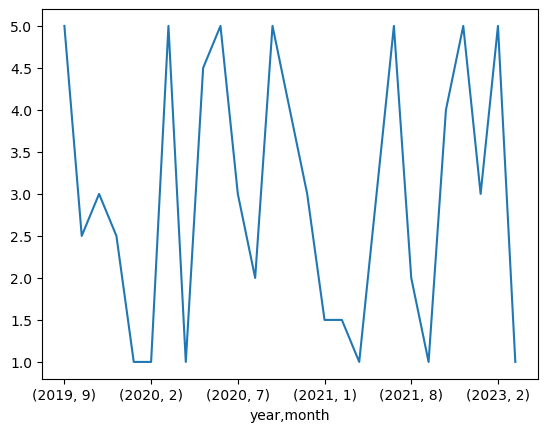

In [11]:
dfmonthly['rating'].plot();